In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


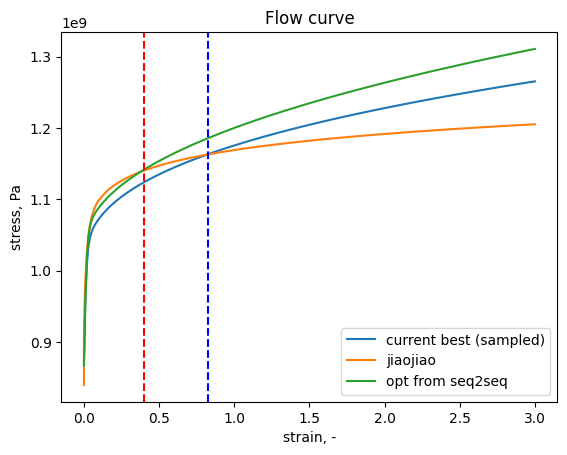

In [37]:
flow_curve_ref = pd.read_excel('flow_curve.xlsx', engine='openpyxl')
flow_curve_jiaojiao = pd.read_excel('flow_curve_jiaojiao.xlsx', engine='openpyxl')

flow_curve_optimization_iter_63 = np.load('iteration_63_predicted_flow_curves.npy', allow_pickle=True).tolist()

#print(flow_curve_optimization_iter_63.values()[1])
stress_ref = flow_curve_ref['stress/Pa']
strain_ref = flow_curve_ref['strain/-']
stress_jiaojiao = flow_curve_jiaojiao['stress/Pa']
strain_jiaojiao = flow_curve_jiaojiao['strain/-']
stress_opt = list(flow_curve_optimization_iter_63.values())[1]["stress"]
strain_opt = list(flow_curve_optimization_iter_63.values())[1]["strain"]

# Now we save the opt curve to xlsx file
df = pd.DataFrame({'stress/Pa': stress_opt, 'strain/-': strain_opt, 'stress/MPa': np.array(stress_opt)/1e6})
df.to_excel('flow_curve_opt.xlsx', index=False)

plt.plot(strain_ref, stress_ref, label='current best (sampled)')
plt.plot(strain_jiaojiao, stress_jiaojiao, label='jiaojiao')
plt.plot(strain_opt, stress_opt, label='opt from seq2seq')
# plot vertical line
plt.axvline(x=strain_jiaojiao[27], color='r', linestyle='--')
plt.axvline(x=strain_ref[52], color='b', linestyle='--')
plt.xlabel('strain, -')
plt.ylabel('stress, Pa')
plt.title('Flow curve')
plt.legend()
plt.show()

In [ ]:
from utils.hardening_laws import *

param_config = {
    "c1": {
        "lower": 0.1, "upper": 0.3, "iter_max_range": 0.016, 
        "exponent": 1e0, "name": "W", "unit": "dimensionless"
    },
    "c2": {
        "lower": 1.0, "upper": 1.4, "iter_max_range": 0.032,
        "exponent": 1e9, "name": "K", "unit": "Pa"
    },
    "c3": {
        "lower": 0.3, "upper": 0.7, "iter_max_range": 0.032,
        "exponent": 1e-4, "name": "PEEQ_0", "unit": "dimensionless"
    },
    "c4": {
        "lower": 0.01, "upper": 0.3, "iter_max_range": 0.024,
        "exponent": 1e0, "name": "n", "unit": "dimensionless"
    },
    "c5": {
        "lower": 0.8, "upper": 1.1, "iter_max_range": 0.024,
        "exponent": 1e9, "name": "sigma_y", "unit": "Pa"
    },
    "c6": {
        "lower": 0.01, "upper": 0.3, "iter_max_range": 0.024,
        "exponent": 1e9, "name": "sigma_sat", "unit": "Pa"
    },
    "c7": {
        "lower": 0.3, "upper": 0.7, "iter_max_range": 0.032,
        "exponent": 1e2, "name": "b", "unit": "dimensionless"
    }
}

flow_curve_PEEQ = flow_curve_ref["strain/-"].to_numpy()
flow_curve_PEEQ_truncated = list(strain_jiaojiao[:27]) + list(strain_ref[52:])
flow_curve_stress_truncated = list(stress_jiaojiao[:27]) + list(stress_ref[52:])
flow_curve_PEEQ_truncated = np.array(flow_curve_PEEQ_truncated)
flow_curve_stress_truncated = np.array(flow_curve_stress_truncated)


fitted_params, lowest_RMSE = calculate_inverse_hardening_law_parameters(\
                                    true_plastic_strain=flow_curve_PEEQ_truncated,
                                    true_stress=flow_curve_stress_truncated,
                                    hardening_law="SwiftVoce", param_config=param_config,
                                    RMSE_threshold=1e-8, 
                                    extrapolate_N_first_strain_values=extrapolate_N_first_strain_values, 
                                    max_iter=100)

print("flow curve fitted parameters are", fitted_params)



flow curve fitted parameters are {'c1': 0.15727705016096644, 'c2': 1067914563.9624242, 'c3': 3e-05, 'c4': 0.3, 'c5': 1024834392.3524709, 'c6': 184082484.57342073, 'c7': 70.0}


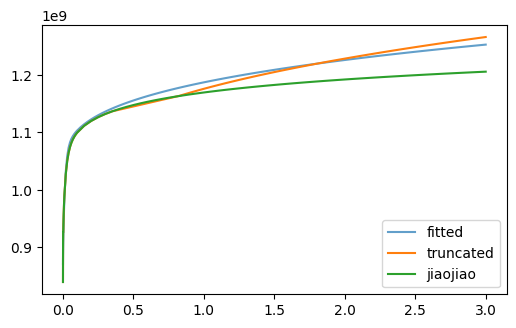

In [46]:
extrapolate_N_first_strain_values_extrapolated = 0
flow_curve_extrapolated = calculate_true_stress(parameters_dict=fitted_params, 
                                                          hardening_law="SwiftVoce", 
                                                          true_plastic_strain=flow_curve_PEEQ, 
                                                          extrapolate_N_first_strain_values = extrapolate_N_first_strain_values_extrapolated)

plt.figure(figsize=(6, 3.5))
# plt.ylim(bottom=-0)
# plt.xlim(left=-0.2, right=3.0)

plt.plot(flow_curve_PEEQ, flow_curve_extrapolated, alpha=0.7, label='fitted')
plt.plot(flow_curve_PEEQ_truncated, flow_curve_stress_truncated, label='truncated')
# plot jioajiao
plt.plot(strain_jiaojiao, stress_jiaojiao, label='jiaojiao')
# plt.plot(steel_4420_TD_flow_PEEQ_mean, steel_4420_TD_flow_interpolated_mean, label='TD mean', alpha=0.33)
plt.legend()
plt.show()

# Save as xlsx file
df = pd.DataFrame({'stress/Pa': flow_curve_extrapolated, 'strain/-': flow_curve_PEEQ, 'stress/MPa': np.array(flow_curve_extrapolated)/1e6})
df.to_excel('flow_curve_fitted_1.xlsx', index=False)

In [ ]:
from utils.hardening_laws import *

param_config = {
    "c1": {
        "lower": 0.1, "upper": 0.3, "iter_max_range": 0.016, 
        "exponent": 1e0, "name": "W", "unit": "dimensionless"
    },
    "c2": {
        "lower": 1.0, "upper": 1.4, "iter_max_range": 0.032,
        "exponent": 1e9, "name": "K", "unit": "Pa"
    },
    "c3": {
        "lower": 0.3, "upper": 0.7, "iter_max_range": 0.032,
        "exponent": 1e-4, "name": "PEEQ_0", "unit": "dimensionless"
    },
    "c4": {
        "lower": 0.01, "upper": 0.3, "iter_max_range": 0.024,
        "exponent": 1e0, "name": "n", "unit": "dimensionless"
    },
    "c5": {
        "lower": 0.8, "upper": 1.1, "iter_max_range": 0.024,
        "exponent": 1e9, "name": "sigma_y", "unit": "Pa"
    },
    "c6": {
        "lower": 0.01, "upper": 0.3, "iter_max_range": 0.024,
        "exponent": 1e9, "name": "sigma_sat", "unit": "Pa"
    },
    "c7": {
        "lower": 0.3, "upper": 0.7, "iter_max_range": 0.032,
        "exponent": 1e2, "name": "b", "unit": "dimensionless"
    }
}

flow_curve_PEEQ = flow_curve_ref["strain/-"].to_numpy()
flow_curve_PEEQ_truncated = list(strain_jiaojiao[:27]) + list(strain_ref[52:])
flow_curve_stress_truncated = list(stress_jiaojiao[:27]) + list(stress_ref[52:])
flow_curve_PEEQ_truncated = np.array(flow_curve_PEEQ_truncated)
flow_curve_stress_truncated = np.array(flow_curve_stress_truncated)


fitted_params, lowest_RMSE = calculate_inverse_hardening_law_parameters(\
                                    true_plastic_strain=flow_curve_PEEQ_truncated,
                                    true_stress=flow_curve_stress_truncated,
                                    hardening_law="SwiftVoce", param_config=param_config,
                                    RMSE_threshold=1e-8, 
                                    extrapolate_N_first_strain_values=extrapolate_N_first_strain_values, 
                                    max_iter=100)

print("flow curve fitted parameters are", fitted_params)

